# **Fashion Recommendation System using Image Features**

### A Fashion Recommendation System using Image Features leverages computer vision and machine learning techniques to analyze fashion items’ visual aspects (like colour, texture, and style) and recommend similar or complementary products to users. So, if you want to learn how to build a Fashion Recommendation System by utilizing image features, this article is for you. In this article, I’ll take you through the task of building a Fashion Recommendation System utilizing Image Features using the Python programming language.

In [76]:
import os
from zipfile import ZipFile
from PIL import Image
import matplotlib.pyplot as plt
import glob
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import numpy as np
from scipy.spatial.distance import cosine


In [77]:
zip_file_path ='/content/women-fashion.zip'
uzip_file_path =  '/content/women_fashion/'

if not os.path.exists(uzip_file_path):
  os.makedirs(uzip_file_path)


with ZipFile(zip_file_path,'r') as zip_ref:
  zip_ref.extractall(uzip_file_path)





In [78]:
os.listdir(uzip_file_path)

['__MACOSX', 'women fashion']

In [79]:
images = os.listdir(os.path.join(uzip_file_path,'women fashion'))
images


['anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg',
 'black top, white trousers.jpg',
 'sleeveless dress adorned with pink sequins.jpg',
 'tight-fitting, off-the-shoulder white dress 2.jpg',
 'form-fitting dress with a vibrant pattern of yellow, blue, and black.jpg',
 'white, intricately detailed top and a flowing dark blue skirt.jpg',
 'pink, knee-length dress that sparkles.jpg',
 'Anarkali suit with fitted bodice with a high neckline.jpg',
 'one-shoulder, fitted dress that features sequin embellishments and sheer panels.jpg',
 'red dress adorned with an intricate white pattern.jpg',
 'bright red kurta with an intricate patterned design.jpg',
 'sparkling black dress.jpg',
 'black floral saree.jpg',
 'anarkali suit with intricate silver embellishments on the neckline, sleeves.jpg',
 'mustard yellow fitted dress with white off-the-shoulder sleeves.webp',
 'sparkling blue dress.jpeg',
 

In [80]:
len(images)

97

In [81]:
def show_img(file_path):
  img =Image.open(file_path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

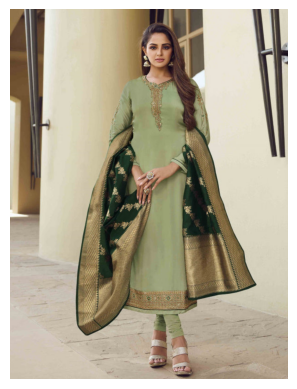

In [82]:
img = os.path.join(uzip_file_path,'women fashion', images[0])

show_img(img)

In [83]:
img_dir ='/content/women_fashion/women fashion'
img_path_list = [file for file in glob.glob(os.path.join(img_dir, '*.*')) if file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]

In [84]:
img_path_list

['/content/women_fashion/women fashion/anarkali suit with a long, olive green kurta adorned with intricate embroidery around the neckline and cuffs, paired with matching fitted trousers.jpg',
 '/content/women_fashion/women fashion/black top, white trousers.jpg',
 '/content/women_fashion/women fashion/sleeveless dress adorned with pink sequins.jpg',
 '/content/women_fashion/women fashion/tight-fitting, off-the-shoulder white dress 2.jpg',
 '/content/women_fashion/women fashion/form-fitting dress with a vibrant pattern of yellow, blue, and black.jpg',
 '/content/women_fashion/women fashion/white, intricately detailed top and a flowing dark blue skirt.jpg',
 '/content/women_fashion/women fashion/pink, knee-length dress that sparkles.jpg',
 '/content/women_fashion/women fashion/Anarkali suit with fitted bodice with a high neckline.jpg',
 '/content/women_fashion/women fashion/one-shoulder, fitted dress that features sequin embellishments and sheer panels.jpg',
 '/content/women_fashion/women

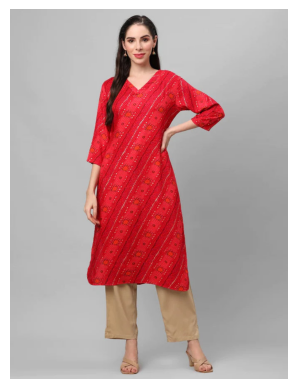

In [85]:
show_img(img_path_list[10])

In [86]:
base = VGG16(weights = 'imagenet', include_top=False)
model = Model(inputs = base.input, outputs = base.output)

def preprocess_img(img_path):
  img = image.load_img(img_path, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  return preprocess_input(img)



def feature_extraction(model, processed_img):
  features =model.predict(processed_img)
  falted_features = features.flatten()
  nomalized_features = falted_features / np.linalg.norm(falted_features)

  return nomalized_features



In [87]:
all_features_extracted= []
features_extraced_name = []

for img_path in img_path_list:
  processed_img  = preprocess_img(img_path)
  features_extracted = feature_extraction(model, processed_img)
  all_features_extracted.append(features_extracted)
  features_extraced_name.append(os.path.basename(img_path))






1/1 [==============================] - 0s 481ms/step


In [88]:
all_features_extracted[0].shape

(25088,)

In [104]:
def recomender_fashion_item(input_img_path, all_features_extracted , features_extraced_name, model, n = 5):
  processed_img = preprocess_img(input_img_path)
  input_features = feature_extraction(model, processed_img)



  similarities = [1 -cosine(input_features, other_feature) for other_feature in all_features_extracted]
  similar_indices = np.argsort(similarities)[ -n:]

  similar_indices = [idx for idx in similar_indices if idx != features_extraced_name.index(os.path.basename(input_img_path))]


  plt.figure(figsize=(15, 10))
  plt.subplot(1, n + 1, 1)
  plt.imshow(Image.open(input_img_path))
  plt.title("Input Image")
  plt.axis('off')


  for i, idx in enumerate(similar_indices[:n],start= 1):
    img_path = os.path.join('/content/women_fashion/women fashion',features_extraced_name[idx] )
    plt.subplot(1, n +1, i + 1)
    plt.title(f"Recommendation {i}")
    plt.imshow(Image.open(img_path))
    plt.axis('off')

  plt.tight_layout()
  plt.show()


1/1 [==============================] - 1s 751ms/step


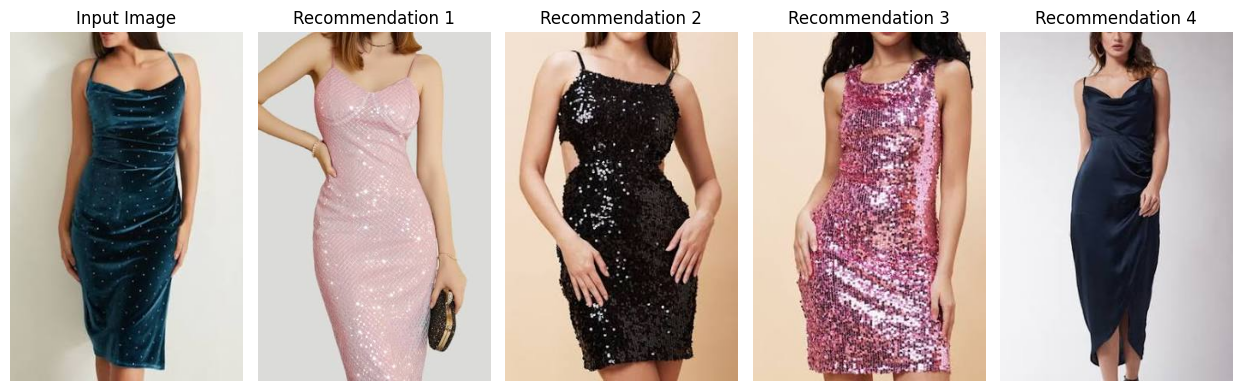

In [116]:
input_img_path = img_path_list[40]
recomender_fashion_item(input_img_path,all_features_extracted , features_extraced_name, model, 5)